Building and Training a Deep Learning Model on "Natural Images"
- A compiled dataset of 6899 images from 8 distinct classes on Kaggle

Finding the Dataset from Kaggle
- Download it as a zip file from https://www.kaggle.com/datasets/prasunroy/natural-images
- The zip file should be called "archive.zip"

Upload the zip file on Google Colab
- Make sure you are connected to a runtime
- Click on "Files" in the left panel in Google Colab
- Drag the "archive.zip" or click on "upload to session storage" to upload the "archive.zip"


In [1]:
# Unzipping the file to reveal the image folder
!unzip -q archive.zip

Getting the images and labels in dictionaries

In [2]:
import pathlib
import glob

# Accessing the file path to the raw dataset
dataset_path = pathlib.Path("/content/natural_images")

# Storing images & their respective label into dict_image
images_labels = {
    'airplane': list(dataset_path.glob('airplane/*')),
    'car': list(dataset_path.glob('car/*')),
    'cat': list(dataset_path.glob('cat/*')),
    'dog': list(dataset_path.glob('dog/*')),
    'flower': list(dataset_path.glob('flower/*')),
    'fruit': list(dataset_path.glob('fruit/*')),
    'motorbike': list(dataset_path.glob('motorbike/*')),
    'person': list(dataset_path.glob('person/*'))
}

# Storing all of the labels of each into dict_label
label_names = {
    'airplane': 0,
    'car': 1,
    'cat': 2,
    'dog': 3,
    'flower': 4,
    'fruit': 5,
    'motorbike': 6,
    'person': 7
}

In [3]:
images_labels # Checking the Dictionary loaded properly

{'airplane': [PosixPath('/content/natural_images/airplane/airplane_0668.jpg'),
  PosixPath('/content/natural_images/airplane/airplane_0705.jpg'),
  PosixPath('/content/natural_images/airplane/airplane_0320.jpg'),
  PosixPath('/content/natural_images/airplane/airplane_0637.jpg'),
  PosixPath('/content/natural_images/airplane/airplane_0719.jpg'),
  PosixPath('/content/natural_images/airplane/airplane_0088.jpg'),
  PosixPath('/content/natural_images/airplane/airplane_0011.jpg'),
  PosixPath('/content/natural_images/airplane/airplane_0664.jpg'),
  PosixPath('/content/natural_images/airplane/airplane_0511.jpg'),
  PosixPath('/content/natural_images/airplane/airplane_0438.jpg'),
  PosixPath('/content/natural_images/airplane/airplane_0209.jpg'),
  PosixPath('/content/natural_images/airplane/airplane_0081.jpg'),
  PosixPath('/content/natural_images/airplane/airplane_0563.jpg'),
  PosixPath('/content/natural_images/airplane/airplane_0067.jpg'),
  PosixPath('/content/natural_images/airplane/airp

In [4]:
label_names

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

Getting dataset ready to be split for training and testing

In [20]:
import cv2
import numpy as np

images = []
labels = []

# Going through images_labels dictionary
for label, image in images_labels.items():
    for img in image:
        # Loading up an image file
        img = cv2.imread(str(img))
        # Resizing the image to 28 X 28
        resized_img = cv2.resize(img, (28, 28))
        # Adding images and labels to lists
        images.append(resized_img)
        labels.append(label_names[label])

# Converting images and labels
images = np.array(images)
labels = np.array(labels)

In [21]:
images.shape

(6899, 28, 28, 3)

In [22]:
labels.shape

(6899,)

Splitting data into training & testing datasets

In [23]:
from sklearn.model_selection import train_test_split
from keras.api.utils import to_categorical

# Splitting data into training and testing datasets
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Applying one-hot encoding
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

Building the Neural Network Model

In [24]:
from keras import models
from keras import layers
from keras import regularizers

# Storign the input shape
images_shape = images.shape[1:]

CNN = models.Sequential()
# Convolution Layer 1
CNN.add(layers.Conv2D(filters=64, kernel_size=5, activation="relu", padding="same", input_shape=images_shape))
CNN.add(layers.MaxPooling2D(pool_size=2, strides=2)) # Pooling 1
# Convolution Layer 2
CNN.add(layers.Conv2D(filters=128, kernel_size=4, activation="relu", padding="same"))
CNN.add(layers.MaxPooling2D(pool_size=2, strides=2)) # Pooling 2
# Convolution Layer 3
CNN.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"))
CNN.add(layers.MaxPooling2D(pool_size=2, strides=2)) # Pooling 3
# Dropout 1
CNN.add(layers.Dropout(0.3))
CNN.add(layers.Flatten()) # Applying flattening
# Full Connection Layer 1
CNN.add(layers.Dense(1028, activation="relu"))
# Dropout 2
CNN.add(layers.Dropout(0.2))
# Full Connection Layer 2
CNN.add(layers.Dense(512, activation="relu", kernel_regularizer=regularizers.L2(0.001)))
# Full Connection Layer 3
CNN.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.L2(0.001)))
# Dropout 3
CNN.add(layers.Dropout(0.1))
# Output Layer
CNN.add(layers.Dense(8, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
CNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1028)                │         593,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1028)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         526,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,463,244 (5.58 MB)

 Trainable params: 1,463,244 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

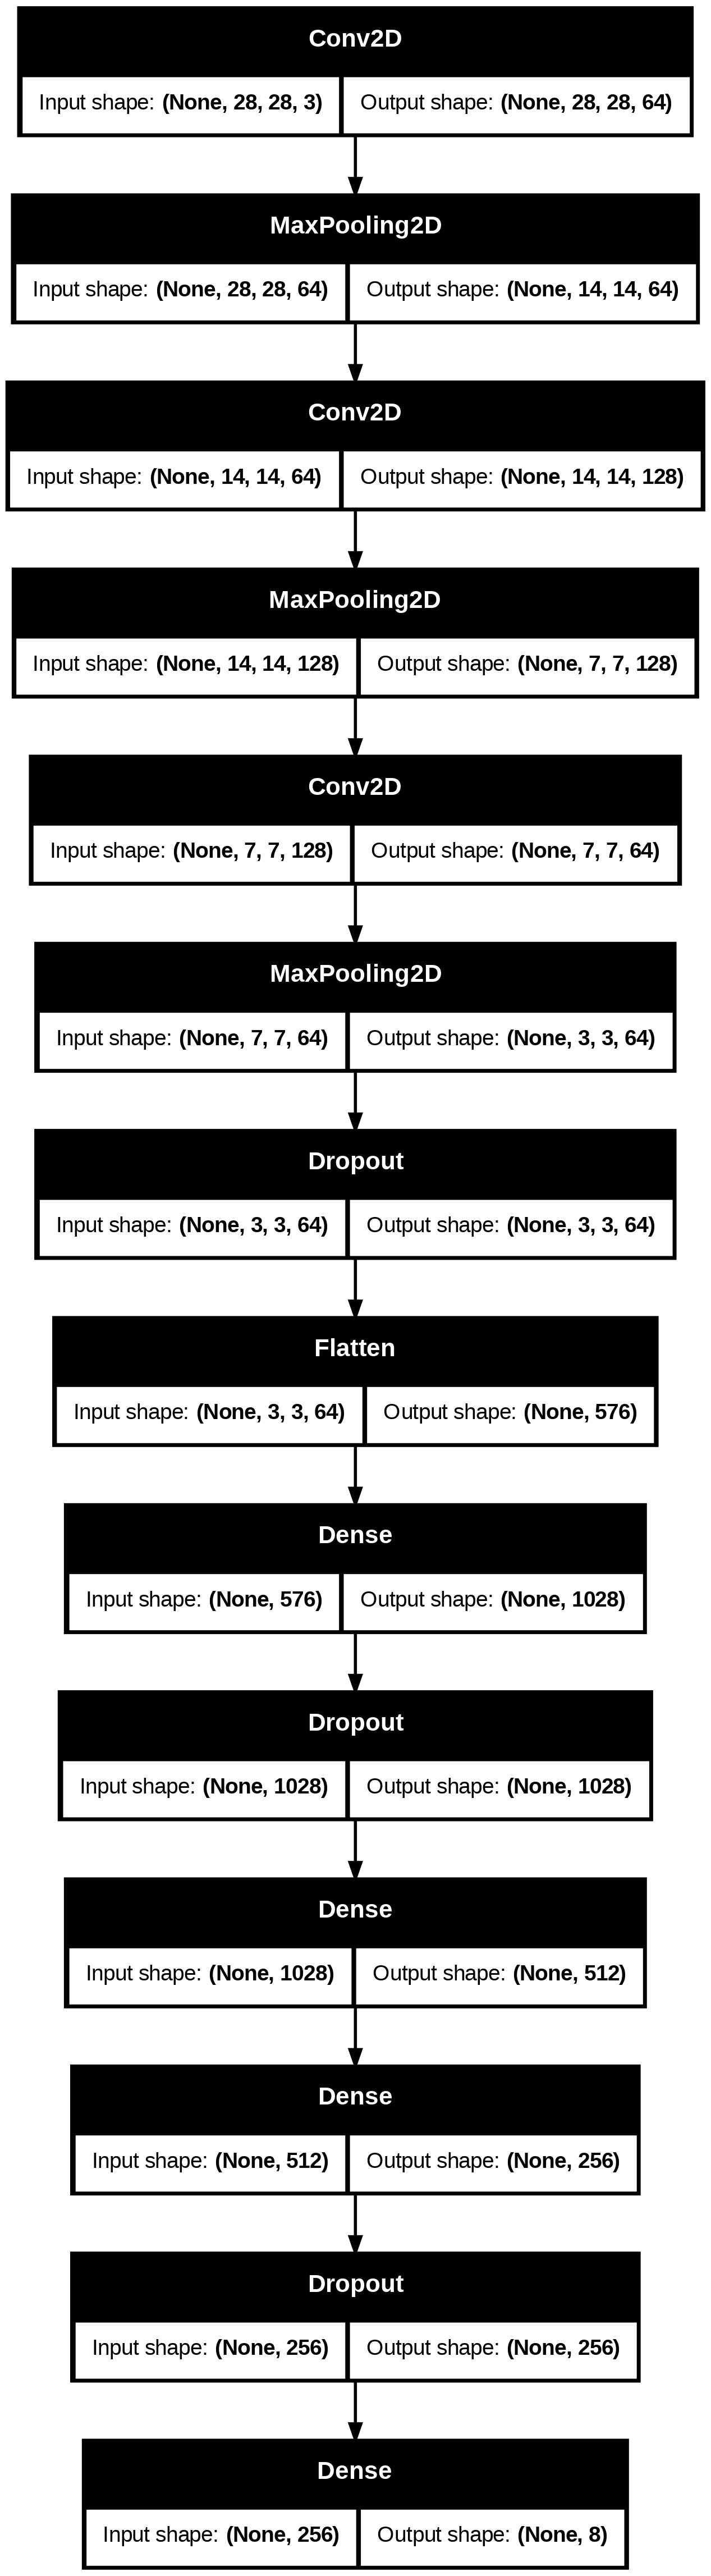

In [26]:
from keras.api.utils import plot_model
plot_model(CNN, show_shapes=True)

Compiling the Neural Network Model

In [27]:
CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model training by fitting the networking to the training data

In [28]:
from keras import callbacks

# Monitoring the validation loss to prevent overfitting
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

# Fitting the model through training
history = CNN.fit(images_train, labels_train, epochs=50, validation_split=0.2, callbacks=[early_stop])

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.2467 - loss: 7.6228 - val_accuracy: 0.5393 - val_loss: 2.3184
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5262 - loss: 2.2149 - val_accuracy: 0.6439 - val_loss: 1.8186
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6575 - loss: 1.8186 - val_accuracy: 0.7567 - val_loss: 1.5098
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7534 - loss: 1.5234 - val_accuracy: 0.7671 - val_loss: 1.4293
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7606 - loss: 1.4146 - val_accuracy: 0.7909 - val_loss: 1.2921
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7507 - loss: 1.3677 - val_accuracy: 0.7836 - val_loss: 1.1986
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7868 - loss: 1.2226 - val_accuracy: 0.8054 - val_loss: 1.1142
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8223 - loss: 1.0925 - val_accuracy:

Evaluating the Model

In [29]:
score = CNN.evaluate(images_test, labels_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8764 - loss: 0.5571


In [30]:
print('Test Loss:', score[0])

Test Loss: 0.5433825254440308


In [31]:
print('Test Accuracy:', score[1])

Test Accuracy: 0.8816425204277039


Analysis of the Model's Performance

In [32]:
from sklearn.metrics import classification_report

images_pred = np.argmax(CNN.predict(images_test), axis=1)
labels_test = np.argmax(labels_test, axis=1)
print(classification_report(labels_test, images_pred))

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       237
           1       0.93      0.94      0.93       302
           2       0.62      0.80      0.70       261
           3       0.71      0.51      0.60       218
           4       0.94      0.85      0.89       246
           5       0.98      1.00      0.99       278
           6       0.95      0.93      0.94       210
           7       0.99      0.98      0.98       318

    accuracy                           0.88      2070
   macro avg       0.88      0.87      0.87      2070
weighted avg       0.89      0.88      0.88      2070



Plotting the Model's Performance
- Comparing Training vs. Validation Loss
- Comparing Training vs Validation Accuracy

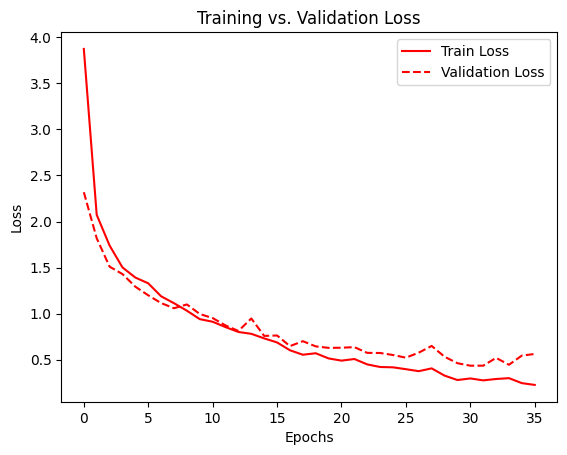

In [33]:
import matplotlib.pyplot as plt

# Plot training vs. validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(loss_values, color='red', label='Training Loss')
plt.plot(val_loss_values, color='red', linestyle='--', label='Validation Loss')

plt.title('Training vs. Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')

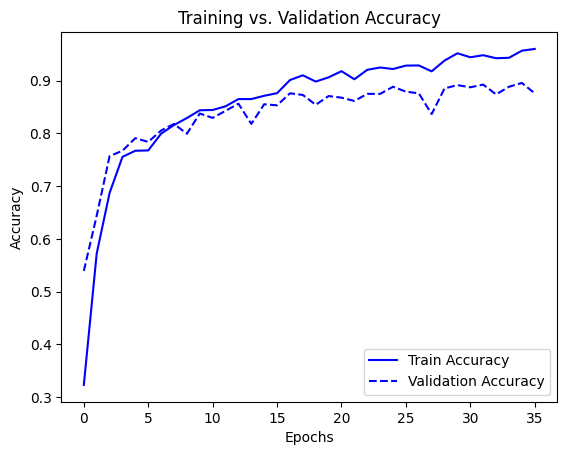

In [34]:
# Plot training vs. validation accuracy
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

plt.plot(acc_values, color='blue', label='Training Accuracy')
plt.plot(val_acc_values, color='blue', linestyle='--', label='Validation Accuracy')

plt.title('Training vs. Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')